In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  
y_train = np.array([0, 0, 0, 1, 1, 1])                                           

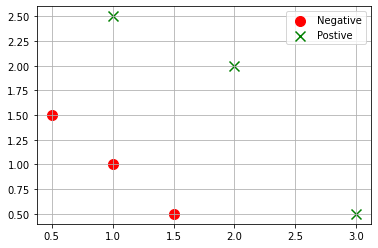

In [61]:
negatives_x1 = (X_train[y_train == 0])[:, 0]
negatives_x2 = (X_train[y_train == 0])[:, 1]

positives_x1 = (X_train[y_train == 1])[:, 0]
positives_x2 = (X_train[y_train == 1])[:, 1]

plt.scatter(negatives_x1, negatives_x2, c='r', label='Negative', s=100)
plt.scatter(positives_x1, positives_x2,
           c='g', label='Postive', marker='x', s=100)
plt.grid()
plt.legend()
plt.show()

In [62]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g 


def cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0

    for i in range(m):
        z = np.dot(X[i], w) + b
        fwb = sigmoid(z)

        loss = -y[i] * np.log(fwb) - (1 - y[i]) * np.log(1 - fwb)
        cost += loss

    cost /= m
    return cost


# More compact version of logistic cost:
def logistic_cost(X, y, w, b):
    m = X.shape[0]
    positive_losses = -1 * np.log(sigmoid(np.dot(X[y == 1], w) + b))
    negative_losses = -1 * np.log(1 - sigmoid(np.dot(X[y == 0], w) + b))
    cost_sum = np.sum(positive_losses) + np.sum(negative_losses)
    return cost_sum / m


logistic_cost(X_train, y_train, [1, 1], -3)
cost(X_train, y_train, [1, 1], -3)

0.36686678640551745

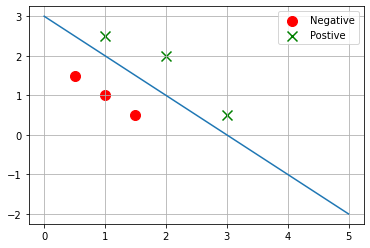

In [70]:
# Let us plot the decision boundary for the chosen w and b
# w0 * x0 + w1 + x1 + b = x0 + x1 -3, let x0 + x1 -3 = 0 --> x1 = -x0 + 3

plt.plot(np.arange(X_train.shape[0]), -np.arange(X_train.shape[0]) + 3)
plt.scatter(negatives_x1, negatives_x2, c='r', label='Negative', s=100)
plt.scatter(positives_x1, positives_x2,
            c='g', label='Postive', marker='x', s=100)
plt.grid()
plt.legend()
plt.show()
plt.show()

In [64]:
import time 
np.random.seed(1)
X = np.random.rand(10000000).reshape(-1, 100)
y = np.random.randint(0, 2, size=(X.shape[0],))
w = np.random.rand(100)
b = 1

start = time.time()
f = cost(X, y, w, b)
stop = time.time()

print(f)
print(f'Former Execution time: {1000 * (stop - start):.3f} ms')

start = time.time()
m = logistic_cost(X, y, w, b)
stop = time.time()

print(m)
print(f'My Execution time: {1000 * (stop - start):.3f} ms')

# Eradicate the arrays from memory
del X
del y

12.287593314972032
Former Execution time: 1780.002 ms
12.287593314976007
My Execution time: 55.946 ms
